<a href="https://colab.research.google.com/github/AshikaAnand12/DimensionalityReduction/blob/main/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
     |████████████████████████████████| 15.8 MB 622 bytes/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 793 kB 42.0 MB/s 
     |████████████████████████████████| 132 kB 56.8 MB/s 
     |████████████████████████████████| 793 kB 73.3 MB/s 
     |████████████████████████████████| 791 kB 77.2 MB/s 
     |████████████████████████████████| 786 kB 75.4 MB/s 
     |████████████████████████████████| 779 kB 67.9 MB/s 
     |████████████████████████████████| 778 kB 56.6 MB/s 
     |████████████████████████████████| 776 kB 49.5 MB/s 
     |████████████████████████████████| 769 kB 57.7 MB/s 
     |████████████████████████████████| 766 kB 48.7 MB/s 
     |████████████████████████████████| 1.0 MB 53.5 MB/s 
     |████████████████████████████████| 722 kB 56.5 MB/s 
     |████████████████████████████████| 722 kB 58.1 MB/s 
     |██████████

# **Image Compression Using PCA**

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(768, 1024, 3)


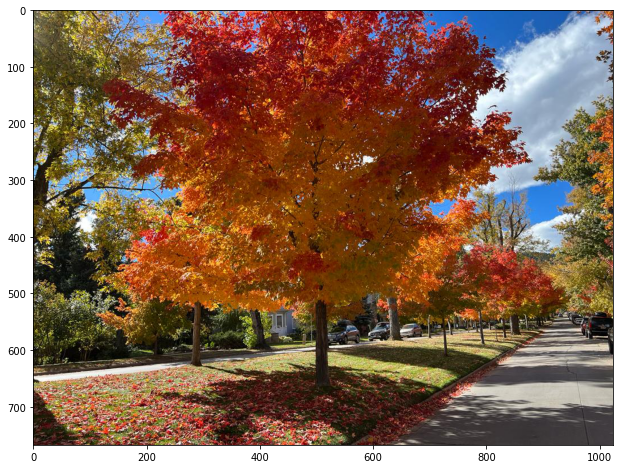

In [30]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/gdrive")

img = imread('/content/gdrive/My Drive/Kaggle/ImageCompression.JPG')
print(img.shape)

# View Image
plt.figure(figsize=[12,8])
plt.imshow(img)

(768, 1024)
1.0


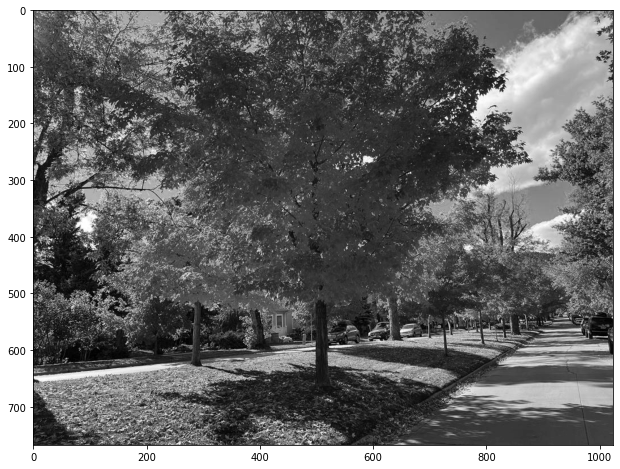

In [31]:
imgSum = img.sum(axis=2)
print(imgSum.shape)

imageBlk = imgSum/imgSum.max()
print(imageBlk.max())

plt.figure(figsize=[12,8])
plt.imshow(imageBlk, cmap=plt.cm.gray)

In [32]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(imageBlk)

CumulativeVar = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(CumulativeVar>95)
print("Number of PCs for 95% variance: "+ str(k))


Number of PCs for 95% variance: 279


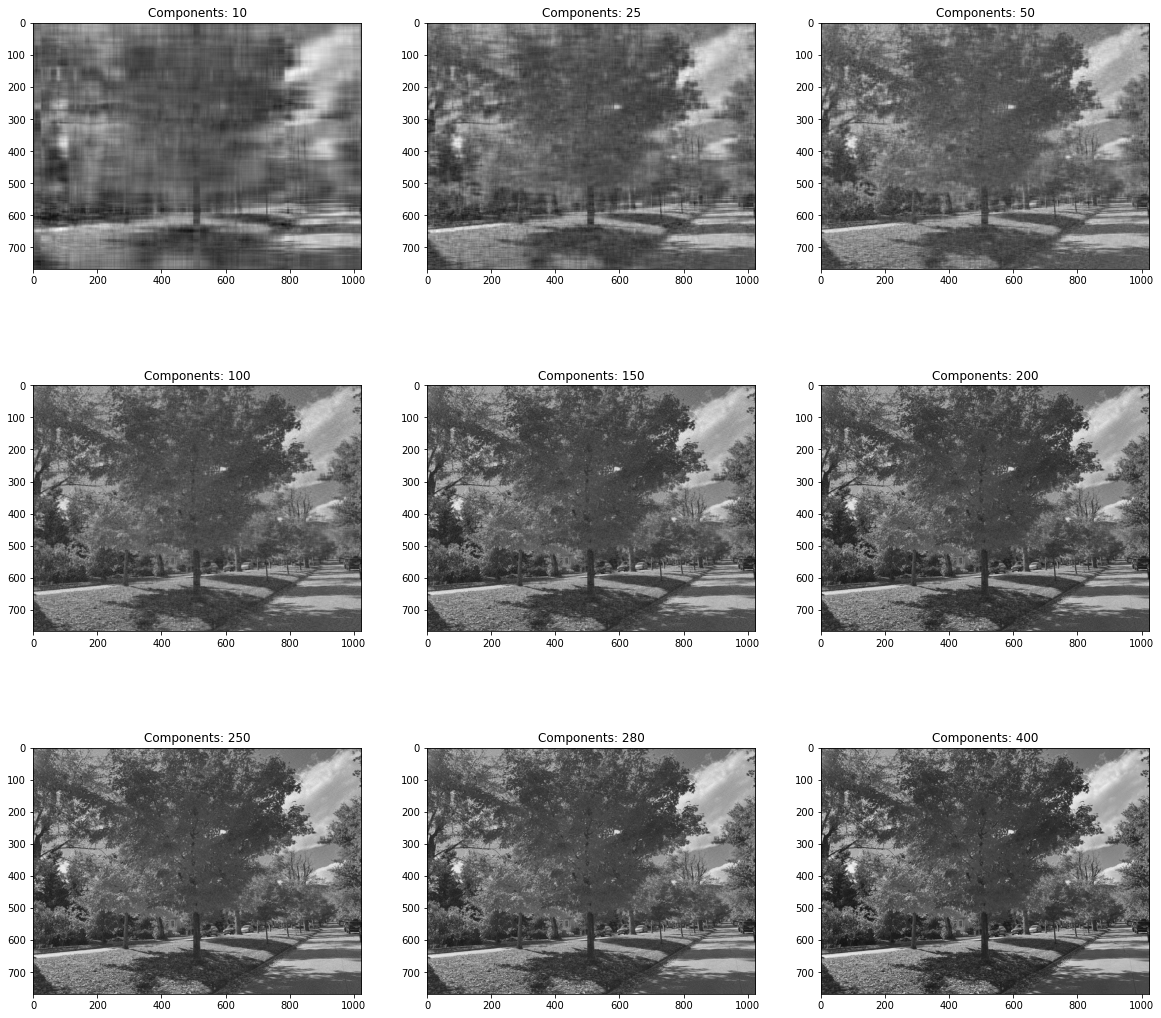

In [33]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(imageBlk))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
ks = [10, 25, 50, 100, 150, 200, 250, 280, 400]

plt.figure(figsize=[20,20])

for i in range(9):
    plt.subplot(3,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# **Image Compression using SVD**

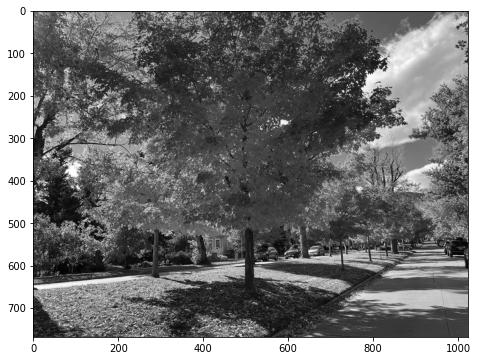

In [37]:
import numpy as np
from random import randrange
import os
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/gdrive/My Drive/Kaggle/ImageCompression.JPG')
imgBlk = img.convert('LA')

imgmat = np.array(list(imgBlk.getdata(band=0)), float)
imgmat.shape = (imgBlk.size[1], imgBlk.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

10
20
30
40
50
60
70
80
90


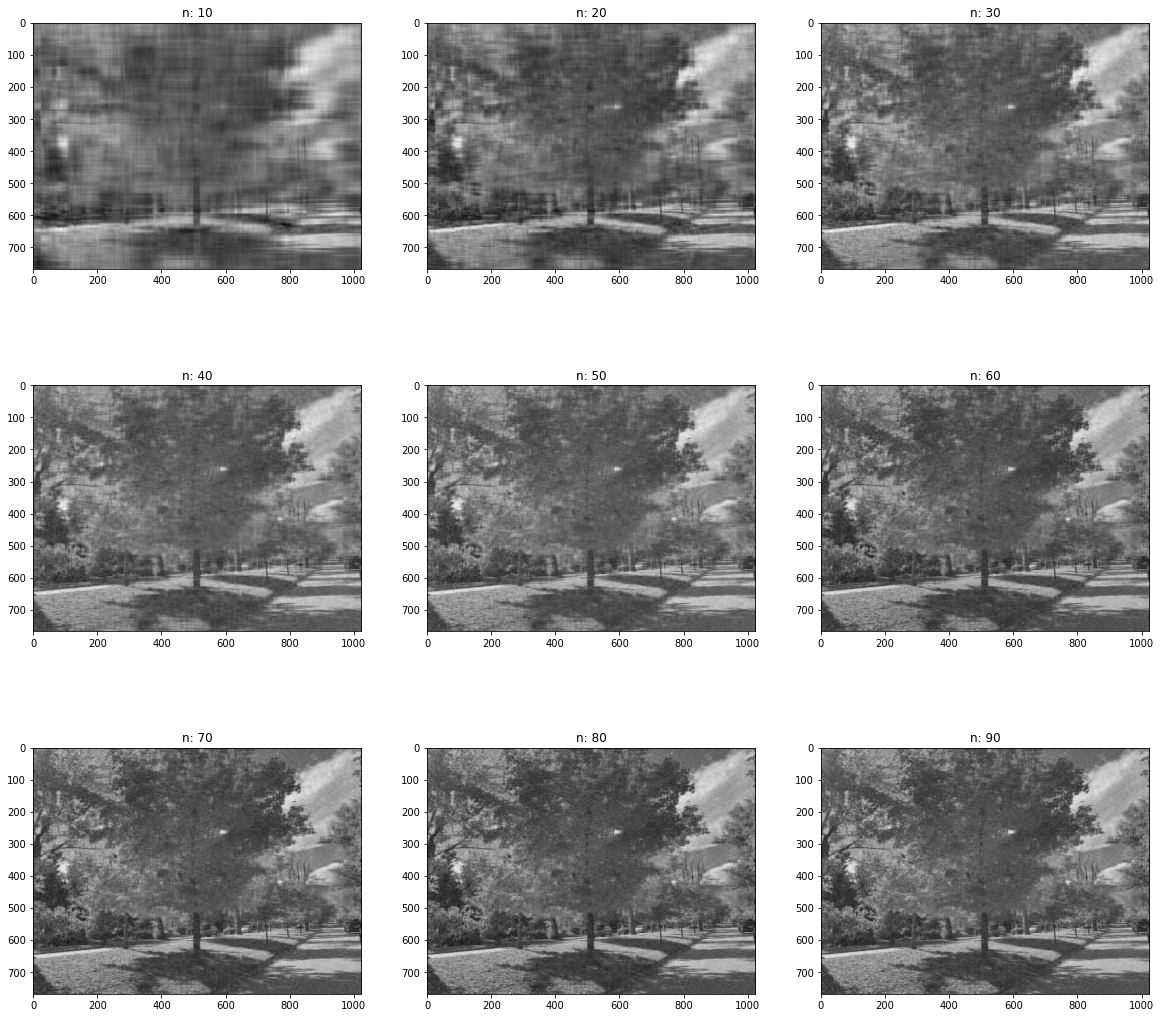

In [47]:
U, sigma, V = np.linalg.svd(imgmat)
ks = [10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.figure(figsize=[20,20])

for i in range(9):
    plt.subplot(3,3,i+1)
    reconstimg = np.matrix(U[:, :ks[i]]) * np.diag(sigma[:ks[i]]) * np.matrix(V[:ks[i], :])
    plt.imshow(reconstimg, cmap='gray')
    plt.title("n: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# **Dimensionality reduction using LLE, t-SNE, ISOMAP, UMAP for Visual Dataset (swiss roll)**

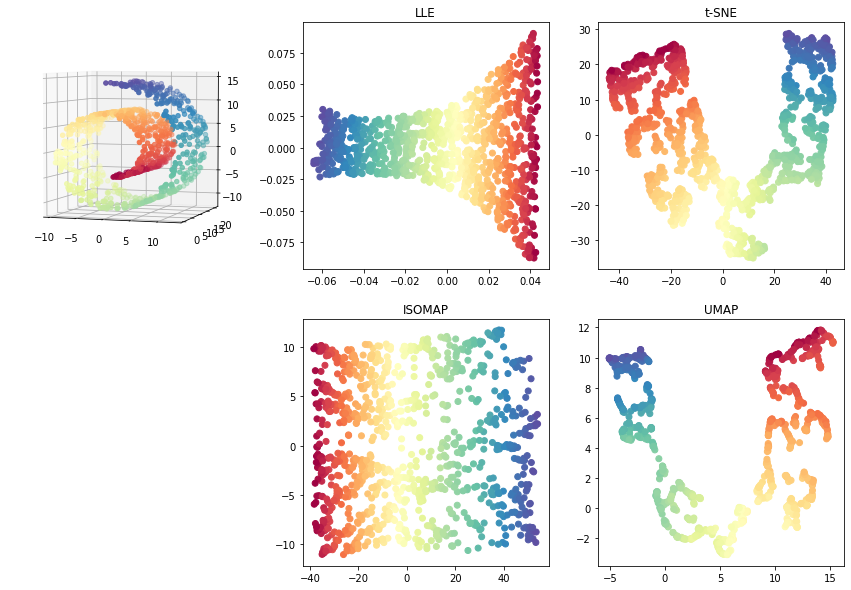

In [94]:
from collections import OrderedDict
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
import umap

# Axes3D
#Making Swiss roll dataset
n_points = 1000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Plot Size
fig = plt.figure(figsize=(15, 10))

# Showcasing 3D plot
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Dictionary of LLE, t-SNE, ISOMAP, UMAP methods
methods = OrderedDict()
methods['LLE'] = manifold.LocallyLinearEmbedding(n_neighbors, n_components)
methods['t-SNE'] = manifold.TSNE(n_components)
methods['ISOMAP'] = manifold.Isomap(n_neighbors, n_components)
methods['UMAP'] = umap.UMAP(n_neighbors, n_components)

# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(2, 3, 2 + i+(i>1))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title(label)
plt.show()

# **Dimensionality Reduction for Numerical**

In [17]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for PCA: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for SVD: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for LLE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for ISOMAP: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy for PCA: 0.824 (0.034)
Accuracy for SVD: 0.824 (0.034)
Accuracy for LLE: 0.886 (0.028)
Accuracy for ISOMAP: 0.888 (0.029)


# **Dimensionality reduction for tabular data using PCA and SVD**

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...          NaN     NaN
4        Adelie  Torgersen  ...       3450.0  FEMALE

[5 rows x 7 columns]

In [21]:
columns_of_interest = ['species_short', "culmen_length_mm", "culmen_depth_mm", 
                       "flipper_length_mm", "body_mass_g", "sex"]
penguins_df = penguins.loc[:,columns_of_interest]

In [22]:
penguins_df=penguins_df.replace(".", np.nan)
penguins_df=penguins_df.dropna()

In [23]:
penguins_df.head()

species_short  culmen_length_mm  ...  body_mass_g     sex
0        Adelie              39.1  ...       3750.0    MALE
1        Adelie              39.5  ...       3800.0  FEMALE
2        Adelie              40.3  ...       3250.0  FEMALE
4        Adelie              36.7  ...       3450.0  FEMALE
5        Adelie              39.3  ...       3650.0    MALE

[5 rows x 6 columns]

In [24]:
penguins_data=penguins_df.select_dtypes(np.number)
penguins_data.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0

In [25]:
penguins_info=penguins_df.select_dtypes(exclude='float')
penguins_info.head()

species_short     sex
0        Adelie    MALE
1        Adelie  FEMALE
2        Adelie  FEMALE
4        Adelie  FEMALE
5        Adelie    MALE

In [26]:
pca = PCA(n_components=4)
penguins_pca= pca.fit_transform(penguins_data)

In [27]:
pc_df = pd.DataFrame(data = penguins_pca , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_df.head()

PC1        PC2       PC3       PC4
0 -457.325073  13.351587  1.236560 -0.335803
1 -407.252205   9.179113 -0.048921 -1.039967
2 -957.044676  -8.160444 -2.525781  0.815745
3 -757.115802  -1.867653 -4.908890  2.163656
4 -557.177302   3.389158 -1.150966  2.702623

In [28]:
pc_df['sex']=penguins_info['sex']
pc_df['species_short']=penguins_info['species_short']
pc_df.head()

PC1        PC2       PC3       PC4     sex species_short
0 -457.325073  13.351587  1.236560 -0.335803    MALE        Adelie
1 -407.252205   9.179113 -0.048921 -1.039967  FEMALE        Adelie
2 -957.044676  -8.160444 -2.525781  0.815745  FEMALE        Adelie
3 -757.115802  -1.867653 -4.908890  2.163656     NaN           NaN
4 -557.177302   3.389158 -1.150966  2.702623  FEMALE        Adelie

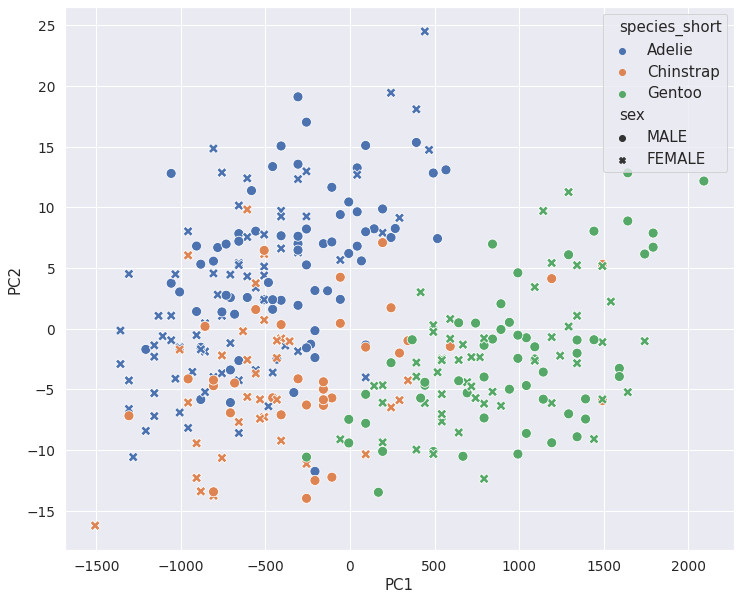

In [29]:
import seaborn as sns
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC2",
                    data=pc_df, 
                    hue="species_short",
                    style="sex",
                    s=100)

In [33]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components = 2)
transformed = svd.fit_transform(penguins_data)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(transformed)

Singular values:
[78250.54164896   499.88401544]
Transformed Matrix after reducing to 2 features:
[[ 3.75460841e+03 -6.69268954e+00]
 [ 3.80478305e+03 -9.04577295e+00]
 [ 3.25584233e+03 -4.42683107e+01]
 [ 3.45548850e+03 -3.22498389e+01]
 [ 3.65515146e+03 -2.04932809e+01]
 [ 3.62974597e+03 -1.24946339e+01]
 [ 4.67920597e+03  2.37631114e+01]
 [ 3.20530078e+03 -3.41640547e+01]
 [ 3.80502149e+03 -1.42456062e+01]
 [ 4.40461933e+03  8.42867572e+00]
 [ 3.70482288e+03 -1.23322345e+01]
 [ 3.45560091e+03 -3.45421815e+01]
 [ 4.50453745e+03  1.26601972e+01]
 [ 3.33018547e+03 -2.89159550e+01]
 [ 4.20478006e+03  4.35407194e-01]
 [ 3.40466827e+03 -1.63080669e+01]
 [ 3.60471926e+03 -1.26079288e+01]
 [ 3.80489298e+03 -1.14907393e+01]
 [ 3.95455420e+03 -7.55516259e-01]
 [ 3.80449570e+03 -3.06603260e+00]
 [ 3.80479254e+03 -9.39188329e+00]
 [ 3.55494545e+03 -1.84631368e+01]
 [ 3.20552867e+03 -3.89310400e+01]
 [ 3.15486352e+03 -2.63690918e+01]
 [ 3.95434797e+03  3.51926842e+00]
 [ 3.25503741e+03 -2.745743